In [1]:
import pandas as pd
import datetime

# グラフ描画
from matplotlib import pylab as plt

# グラフを横長にする
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
from oanda_utils import get_candles_df

In [3]:
df_m = get_candles_df(5000, 'M1', "USD_JPY")
df_h = get_candles_df(5000, 'H1', "USD_JPY")
df_d = get_candles_df(5000, 'D', "USD_JPY")

In [5]:
df_m.to_csv("data/usd_jpy_m1.csv", index=False)
df_h.to_csv("data/usd_jpy_h1.csv", index=False)
df_d.to_csv("data/usd_jpy_d.csv", index=False)

In [16]:
target_time = df_m['time'][100]

to_minute = target_time
from_minute = to_minute  - datetime.timedelta(minutes = 60)
print(from_minute, "-", to_minute)

to_hour = target_time - datetime.timedelta(minutes = target_time.minute)
from_hour = to_hour - datetime.timedelta(minutes = target_time.minute, hours = 24)
print(from_hour, "-", to_hour)

to_date = target_time -  datetime.timedelta(days=1, minutes = target_time.minute, hours = target_time.hour)
from_date = to_date-  datetime.timedelta(days=31)

print(from_date, "-", to_date)

2021-02-09 08:58:00+00:00 - 2021-02-09 09:58:00+00:00
2021-02-08 08:02:00+00:00 - 2021-02-09 09:00:00+00:00
2021-01-08 00:00:00+00:00 - 2021-02-08 00:00:00+00:00


In [19]:
m_cond = (df_m['time']  < to_minute) & (df_m['time']  >= from_minute)
h_cond =  (df_h['time']  < to_hour) & (df_h['time']  >= from_hour)
d_cond = (df_d['time'] < to_date) & (df_d['time'] >= from_date)

df_m_target = df_m[m_cond]
df_h_target = df_h[h_cond]
df_d_target = df_d[d_cond]

In [24]:
df_target = pd.concat([df_d_target, df_h_target, df_m_target]).set_index('time')
df_target

,flg,O,H,L,C,V
time,,,,,,
2021-01-10 22:00:00+00:00,True,103.898,104.398,103.892,104.264,68066
2021-01-11 22:00:00+00:00,True,104.269,104.334,103.722,103.752,69514
2021-01-12 22:00:00+00:00,True,103.764,103.998,103.526,103.884,66500
2021-01-13 22:00:00+00:00,True,103.891,104.198,103.563,103.803,77626
2021-01-14 22:00:00+00:00,True,103.808,103.914,103.617,103.876,60617
...,...,...,...,...,...,...
2021-02-09 09:53:00+00:00,True,104.588,104.590,104.574,104.574,24
2021-02-09 09:54:00+00:00,True,104.578,104.584,104.572,104.572,41
2021-02-09 09:55:00+00:00,True,104.570,104.574,104.566,104.566,51


<AxesSubplot:xlabel='time'>

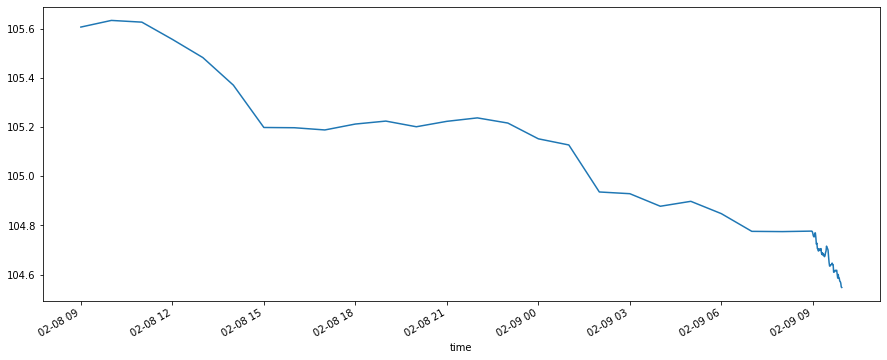

In [27]:
df_target['C'][-84:].plot()

<AxesSubplot:xlabel='time'>

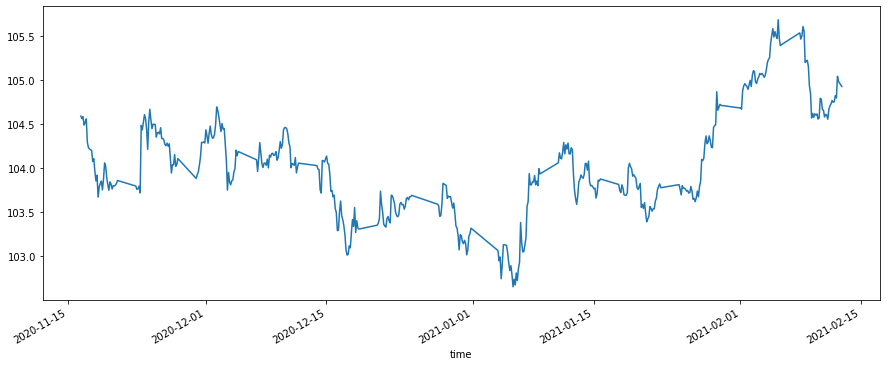

In [10]:
df['C'].plot()

<AxesSubplot:xlabel='time'>

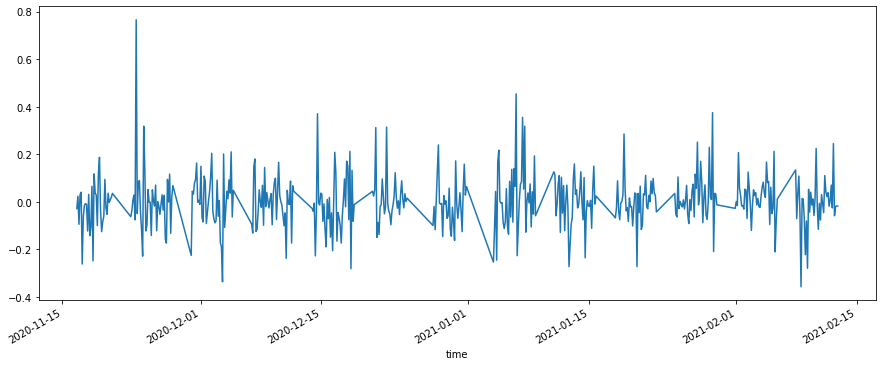

In [11]:
df_diff['C'].plot()